In [87]:
# Setup and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import shap

# Download necessary NLTK data
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# Initialize stop words and stemmer
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
# Load Data
column_names = ['id', 'topic', 'sentiment', 'text']
file_path = "/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv"
df = pd.read_csv(file_path, names=column_names)

# Drop 'id' column
df.drop('id', axis=1, inplace=True)

# Remove rows with NaN values in the 'sentiment' column
df = df.dropna(subset=['sentiment'])

# Inspect the first few rows and columns
df.head()
print(df.columns)


Index(['topic', 'sentiment', 'text'], dtype='object')


In [89]:
# Data Cleaning and Preprocessing

def preprocess_text(text):
    # Convert to string
    text = str(text)
    
    # Removing punctuation, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stop words and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    
    return ' '.join(tokens)

# Apply the preprocess_text function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)
df.head()


,topic,sentiment,text
0,Borderlands,Positive,im get borderland murder
1,Borderlands,Positive,come border kill
2,Borderlands,Positive,im get borderland kill
3,Borderlands,Positive,im come borderland murder
4,Borderlands,Positive,im get borderland murder


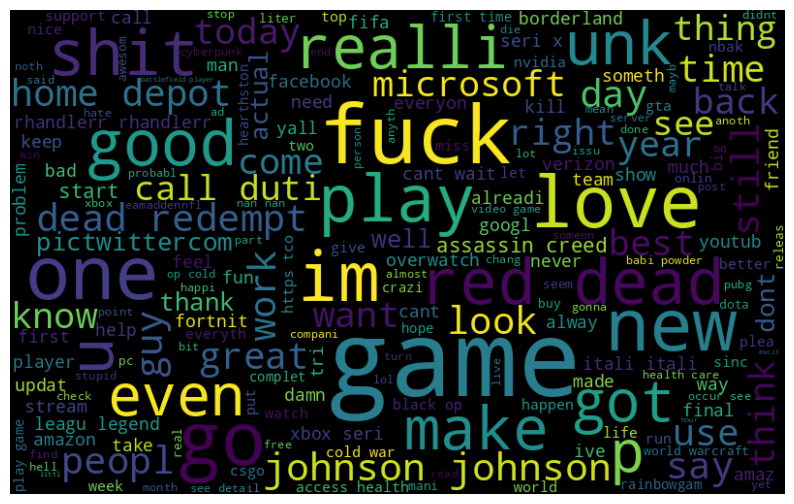

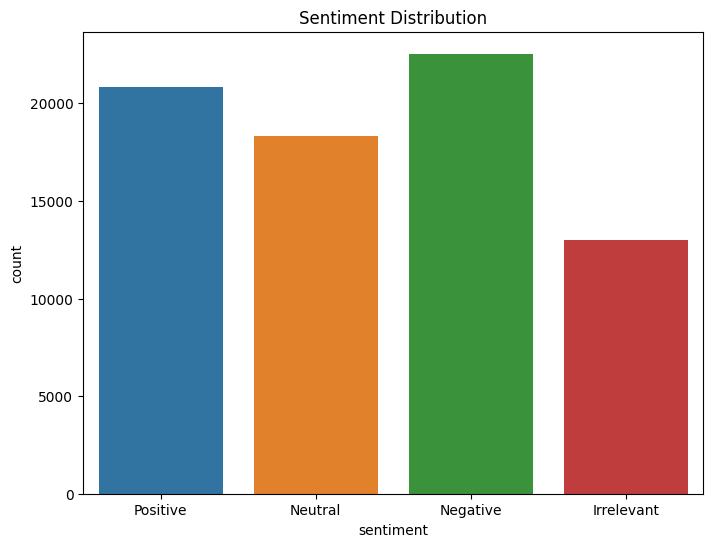

In [90]:
# Text Visualization

# Generate Word Cloud
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [91]:
# Train-Test Split
X = df['text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.6753029390105109
Precision: 0.6745162045490116
Recall: 0.6753029390105109
F1 Score: 0.6731394037830418


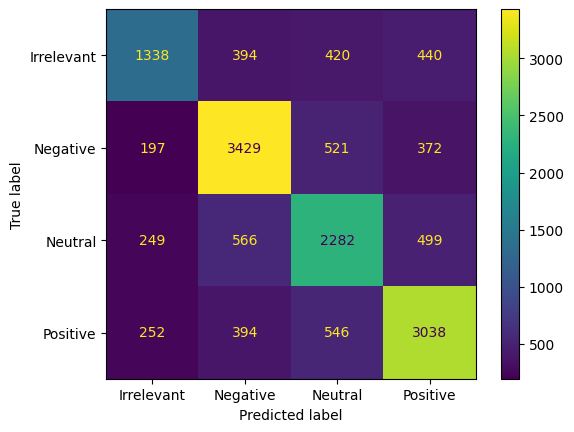

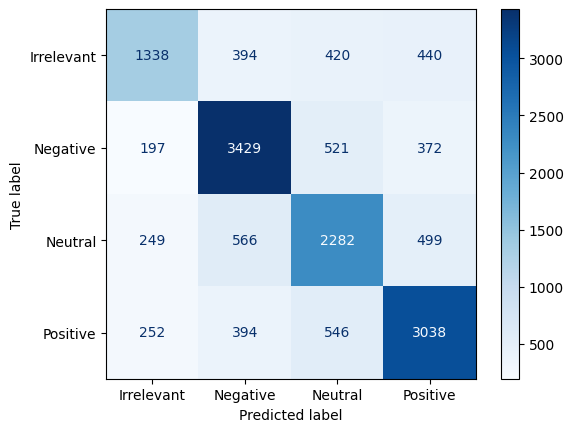

In [100]:
# Build and Evaluate Model
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


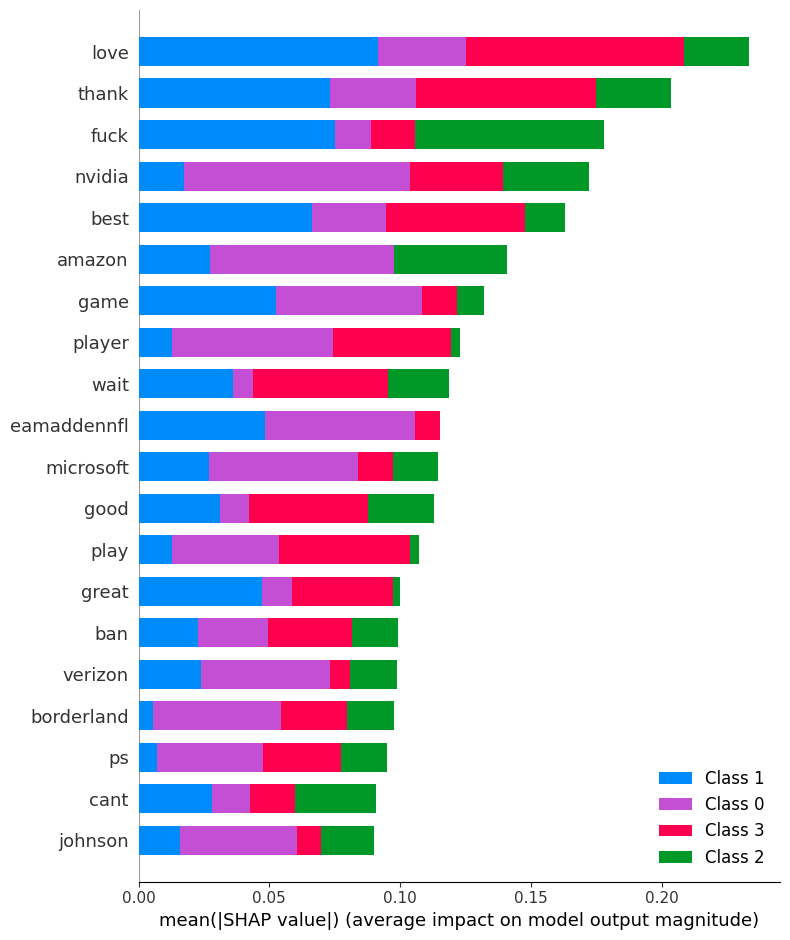

In [94]:
# SHAP Analysis
explainer = shap.LinearExplainer(model, X_train_tfidf)
shap_values = explainer.shap_values(X_test_tfidf)

shap.summary_plot(shap_values, X_test_tfidf, feature_names=tfidf_vectorizer.get_feature_names_out())


In [95]:
def predict_sentiment(text):
    preprocessed_text = preprocess_text(text)

    # Transform the preprocessed text into TF-IDF vectors
    X_new = vectorizer.transform([preprocessed_text])

    # Make predictions
    predicted_sentiment = model.predict(X_new)

    # Print the predicted sentiment
    print("Predicted sentiment:", predicted_sentiment)

In [96]:
predict_sentiment("nothing")

Predicted sentiment: ['Neutral']


In [97]:
predict_sentiment("Nvdia is a Giant Company")

Predicted sentiment: ['Positive']


In [98]:
predict_sentiment("Die you son of something")

Predicted sentiment: ['Negative']
